# Week 6 Code Explanation
Importing libraries

In [8]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

### Graph Construction and Visualization from CSV Data

This code segment focuses on importing node and edge data from CSV files, constructing a directed graph using the networkx library, and visualizing it. Key steps include reading CSV files to obtain graph components, building the graph, counting its nodes for a basic size overview, and employing a circular layout for visualization. This process is vital for network analysis, offering insights into the structural relationships within the graph.

The number of nodes in the graph isDiGraph with 82 nodes and 162 edges.


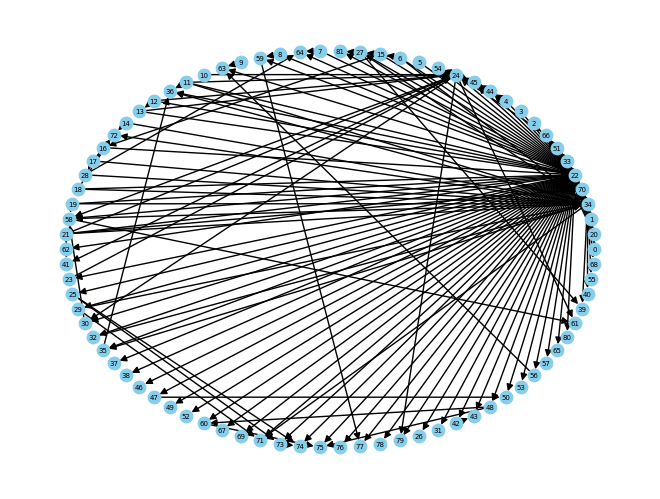

In [9]:
#IMPORTING DATABASE
edges_filename = "edges.csv"
nodes_filename = "nodes.csv"

df_edges = pd.read_csv(edges_filename)
df_nodes = pd.read_csv(nodes_filename)

# Create the graph using the edges CSV
G = nx.from_pandas_edgelist(df_edges, '# source', ' target', create_using=nx.DiGraph())

# Number of nodes
N = G.number_of_nodes()
print('The number of nodes in the graph is' + str(G) + '.')

# Circular plot
nx.draw_circular(G, with_labels="True",node_color='skyblue', edge_color='black', node_size=80, font_size=5, arrows=True)

### Refining an Undirected Graph and Isolating its Largest Component

This code segment converts a directed graph to undirected, removes self-loops, and then isolates its largest connected component. By focusing on this principal component, the code enables targeted analysis of the most interconnected part of the network, providing valuable insights into its core structure and relationships.







In [10]:
# part 0

# Convert G to an undirected graph
G_undirected = G.to_undirected()

# Remove self-loops
G_undirected.remove_edges_from(nx.selfloop_edges(G_undirected))

# Identify the largest connected component
largest_cc = max(nx.connected_components(G_undirected), key=len)

# Create a subgraph of G_undirected with only the nodes in the largest connected component
G_largest_cc = G_undirected.subgraph(largest_cc).copy()

### Community Detection in Graphs Using Various Techniques

This code demonstrates three community detection methods on a graph: Bridge Removal, Modularity Optimization (Louvain Method), and Label Propagation. Each method aims to identify distinct communities within the graph by analyzing its structure. The code first applies bridge removal, identifying communities by iteratively removing edges with high betweenness centrality. It then uses the Louvain method for modularity optimization, a popular approach for detecting community structures. Finally, the label propagation technique is employed, using a simple yet effective method for community detection. The results include the community partitions and their respective modularities, offering insights into the graph's community structure. This analysis is crucial for understanding the complex interrelations in networks.

In [11]:
# part 1

import community as community_louvain

def modularity_optimization(graph):
    partition = community_louvain.best_partition(graph)
    modularity = community_louvain.modularity(partition, graph)
    return partition, modularity
# Assuming G_largest_cc is the undirected graph to be used for community detection.
# We'll implement three community detection techniques.

# Bridge Removal
def bridge_removal(graph):
    # Make a copy of the graph
    G = graph.copy()
    # While the graph is connected
    while nx.is_connected(G):
        # Compute the edge betweenness
        bridges = list(nx.edge_betweenness_centrality(G).items())
        # Remove the edge with the highest betweenness
        bridge = max(bridges, key=lambda x: x[1])[0]
        G.remove_edge(*bridge)
    # The graph is no longer connected, so we have our communities
    # Now compute the modularity of the resulting partition
    communities = list(nx.connected_components(G))
    modularity = nx.algorithms.community.modularity(graph, communities)
    return communities, modularity

# Modularity Optimization (Louvain method)
def modularity_optimization(graph):
    import community as community_louvain
    partition = community_louvain.best_partition(graph)
    modularity = community_louvain.modularity(partition, graph)
    return partition, modularity

# Label Propagation
def label_propagation(graph):
    communities = list(nx.algorithms.community.label_propagation_communities(graph))
    modularity = nx.algorithms.community.modularity(graph, communities)
    return communities, modularity

# Now, we'll apply these methods to our mock graph G_largest_cc
bridge_communities, bridge_modularity = bridge_removal(G_largest_cc)
louvain_partition, louvain_modularity = modularity_optimization(G_largest_cc)
label_communities, label_modularity = label_propagation(G_largest_cc)

# Output the results
bridge_communities, bridge_modularity, louvain_partition, louvain_modularity, label_communities, label_modularity


([{0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   57,
   58,
   59,
   60,
   61,
   62,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81},
  {9, 56, 63}],
 0.024005486968449886,
 {0: 0,
  20: 0,
  1: 0,
  34: 0,
  70: 0,
  22: 1,
  33: 0,
  51: 0,
  66: 0,
  2: 1,
  3: 1,
  4: 2,
  44: 2,
  45: 2,
  24: 2,
  54: 2,
  5: 1,
  6: 5,
  15: 5,
  27: 5,
  81: 5,
  7: 4,
  64: 4,
  8: 1,
  59: 1,
  9: 1,
  63: 1,
  10: 2,
  11: 0,
  36: 0,
  12: 2,
  13: 2,
  14: 4,
  72: 4,
  16: 5,
  17: 4,
  28: 4,
  18: 4,
  19: 2,
  58: 2,
  21: 2,
  62: 2,
  41: 2,
  23: 2,
  25: 1,
  29: 0,
  30: 2,
  3

### Comparative Analysis of Community Detection Methods in Network Graphs

This code performs a comparative analysis of three community detection methods (Bridge Removal, Louvain Modularity Optimization, and Label Propagation) on a network graph. It involves timing each method, computing community structures and their modularities, and evaluating cluster size distributions. The results are organized into DataFrames for each method, providing a clear comparison of the number of clusters, cluster sizes, computational time, and modularity scores. This structured approach allows for an in-depth evaluation of the efficiency and effectiveness of each community detection technique, offering valuable insights for network analysis.

In [12]:
# part 2

import time
import pandas as pd
import networkx as nx
from collections import defaultdict

# Assuming G_largest_cc is already defined and is the graph you are working with.

# Function to invert the Louvain partition dictionary
def invert_partition(partition_dict):
    community_to_nodes = defaultdict(list)
    for node, community in partition_dict.items():
        community_to_nodes[community].append(node)
    return community_to_nodes

# Function to get cluster size distribution
def cluster_size_distribution(communities):
    return [len(c) for c in communities]

# Bridge Removal Method
start_time = time.time()
bridge_communities, bridge_modularity = bridge_removal(G_largest_cc)
bridge_time = time.time() - start_time
bridge_cluster_sizes = cluster_size_distribution(bridge_communities)

# DataFrame for Bridge Removal Method
df_bridge = pd.DataFrame([{
    'Method': 'Bridge Removal',
    'Num Clusters': len(bridge_communities),
    'Cluster Size Distribution': bridge_cluster_sizes,
    'Computational Time': bridge_time,
    'Modularity': bridge_modularity
}])

# Modularity Optimization Method (Louvain)
start_time = time.time()
louvain_partition, louvain_modularity = modularity_optimization(G_largest_cc)
louvain_time = time.time() - start_time
louvain_communities = invert_partition(louvain_partition)
louvain_cluster_sizes = cluster_size_distribution(louvain_communities.values())

# DataFrame for Modularity Optimization Method (Louvain)
df_louvain = pd.DataFrame([{
    'Method': 'Modularity Optimization (Louvain)',
    'Num Clusters': len(louvain_communities),
    'Cluster Size Distribution': louvain_cluster_sizes,
    'Computational Time': louvain_time,
    'Modularity': louvain_modularity
}])

# Label Propagation Method
start_time = time.time()
label_communities, label_modularity = label_propagation(G_largest_cc)
label_time = time.time() - start_time
label_cluster_sizes = cluster_size_distribution(label_communities)

# DataFrame for Label Propagation Method
df_label = pd.DataFrame([{
    'Method': 'Label Propagation',
    'Num Clusters': len(label_communities),
    'Cluster Size Distribution': label_cluster_sizes,
    'Computational Time': label_time,
    'Modularity': label_modularity
}])

# Concatenate all DataFrames
comparison_results = pd.concat([df_bridge, df_louvain, df_label], ignore_index=True)

# Display the DataFrame
comparison_results




,Method,Num Clusters,Cluster Size Distribution,Computational Time,Modularity
0,Bridge Removal,2,"[79, 3]",0.033362,0.024005
1,Modularity Optimization (Louvain),6,"[19, 34, 17, 6, 3, 3]",0.002620,0.427964
2,Label Propagation,2,"[5, 77]",0.001049,0.083829


 part 3: 
 
Based on the results of the community detection methods as shown in the image, here's an interpretation for part 3 of your project:

**Bridge Removal** method resulted in just two clusters, one significantly larger than the other. This indicates that the method has potentially identified one dominant community with a few outliers or a sub-community. The modularity score is the lowest of the three methods, suggesting that the division of the network into communities is not very strong.

**Modularity Optimization (Louvain)** method produced six clusters with a more balanced distribution of community sizes, indicating that it has detected a more nuanced community structure within the network. The modularity score is substantially higher than the other two methods, which means that the Louvain method has partitioned the network into communities with more dense connections within them and sparser connections between them.

**Label Propagation** method has identified two clusters, similar to the Bridge Removal method, but with a more even distribution of sizes. Its modularity score is higher than that of the Bridge Removal but still significantly lower than the Louvain method.

**Interpretation and Best Method Choice**:
- The **Louvain method** appears to be the best for this network due to its high modularity score, which indicates strong community structure.
- The **Label Propagation** method is fast (lowest computational time) and may be useful for a quick overview or for very large networks where computational efficiency is a concern. However, it doesn't provide as clear a community structure as the Louvain method.
- The **Bridge Removal** method, despite being the slowest, does not offer a compelling advantage in terms of the resulting community structure as indicated by its low modularity score.

In conclusion, the **Louvain method** is the best choice for this network among the three methods tested. It finds a more detailed and nuanced community structure without being excessively computationally demanding, and the high modularity score suggests that the communities it finds are meaningful.

### Visualizing Community Structure in a Network Grap

This code visualizes the community structure of a network graph identified through the Louvain method. It assigns unique colors to each community and displays the graph with these colors. The layout used is spring_layout, but can be substituted with any other. Edges are drawn with partial transparency for clarity, while nodes are colored according to their community membership, enhancing the visual distinction between different communities. This visualization is essential for intuitively understanding the community structures within the network, making complex interrelations more accessible and interpretable.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


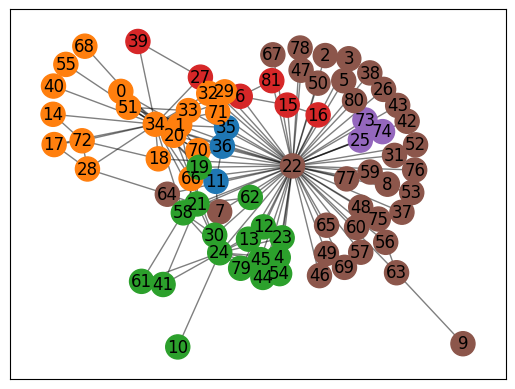

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G_largest_cc is your graph and louvain_partition contains the community info
# where each node's community is indicated by a corresponding integer

# Create a color map based on the communities
community_colors = {node: 'C' + str(louvain_partition[node]) for node in G_largest_cc.nodes()}

# Draw the graph
pos = nx.spring_layout(G_largest_cc)  # or any other layout you prefer
nx.draw_networkx_edges(G_largest_cc, pos, alpha=0.5)
nx.draw_networkx_nodes(G_largest_cc, pos, node_color=list(community_colors.values()), cmap=plt.cm.jet)
nx.draw_networkx_labels(G_largest_cc, pos)

plt.show()


###  Integrating Community Data into Graph and Exporting for Visualization

This code enhances a network graph by adding community information to each node and then exports the graph to a GEXF file for further analysis or visualization, typically in Gephi. It iterates through the nodes of G_largest_cc, assigning community labels from the louvain_partition. The final step involves writing the graph to a GEXF file, a standard format compatible with many graph analysis tools. This process is crucial for transferring complex network data into visual analysis software, facilitating deeper exploration and presentation of the community structures within the network.







In [14]:
# part 4

for node in G_largest_cc.nodes():
    G_largest_cc.nodes[node]['community'] = louvain_partition[node]

# Now write the graph to a GEXF file with the correct extension
nx.write_gexf(G_largest_cc, "ant.gexf")



### Comparing Community Detection Methods Using Normalized Mutual Information

This code compares different community detection methods (Bridge Removal, Louvain, and Label Propagation) using Normalized Mutual Information (NMI). It first converts community data into a consistent format, then calculates the NMI between each pair of community detection methods. NMI is a statistical measure used to assess the similarity between two partitions, making it a valuable tool for evaluating the effectiveness and agreement of different community detection approaches. This comparison is crucial in network analysis to understand the consistency and reliability of community detection algorithms.







In [17]:
# part 5

from sklearn.metrics import normalized_mutual_info_score



def partition_to_list(partition, graph):
    # Create a list with a default community index
    partition_list = [-1] * len(graph)
    
    # Loop through each community in the partition and assign the community index to all nodes in that community
    for community_index, community in enumerate(partition):
        for node in community:
            partition_list[node] = community_index
    return partition_list

# Assuming G_largest_cc is the graph and is indexed from 0 to num_nodes-1
bridge_list = partition_to_list(bridge_communities, G_largest_cc)
label_list = partition_to_list(label_communities, G_largest_cc)
louvain_list = [louvain_partition[node] for node in sorted(G_largest_cc.nodes())]  # Ensure nodes are sorted

# Now compute NMI between each pair of partitions
nmi_bridge_louvain = normalized_mutual_info_score(bridge_list, louvain_list)
nmi_bridge_label = normalized_mutual_info_score(bridge_list, label_list)
nmi_label_louvain = normalized_mutual_info_score(label_list, louvain_list)

# Output the results
print(f"NMI between Bridge Removal and Louvain: {nmi_bridge_louvain}")
print(f"NMI between Bridge Removal and Label Propagation: {nmi_bridge_label}")
print(f"NMI between Label Propagation and Louvain: {nmi_label_louvain}")



NMI between Bridge Removal and Louvain: 0.04097082342688548
NMI between Bridge Removal and Label Propagation: 0.012138812860413382
NMI between Label Propagation and Louvain: 0.1135227125104267


Based on the provided NMI scores, we can interpret the results as follows:

1. **NMI between Bridge Removal and Louvain**: The score of approximately 0.04097 suggests a low similarity between the communities detected by the Bridge Removal method and the Louvain method. This indicates that the two methods have identified quite different community structures in your network.

2. **NMI between Bridge Removal and Label Propagation**: The score of approximately 0.01213 is even lower, indicating very little agreement between the communities detected by the Bridge Removal method and those identified by the Label Propagation method. It suggests that these two methods are almost entirely divergent in how they classify nodes into communities.

3. **NMI between Label Propagation and Louvain**: The score of approximately 0.11352, while higher than the other two comparisons, is still relatively low. This indicates that while there is some overlap in the communities detected by the Label Propagation and Louvain methods, they still differ significantly.

**Discussion**:

- The **Louvain method** appears to have a fundamentally different approach to detecting communities compared to the Bridge Removal and Label Propagation methods, as indicated by the low NMI scores.

- The **Label Propagation and Bridge Removal methods** are the least similar in terms of community detection. Given that Label Propagation is a heuristic based on local node information and Bridge Removal relies on global network properties (edge betweenness), it's not surprising that they yield very different community structures.

- None of the NMI scores are close to 1, which implies that there's no strong consensus between the methods on how the nodes in your network are grouped into communities.

These results suggest that community detection in your network is sensitive to the method used, which may reflect the complexity and heterogeneity of the network's structure. It may be useful to consider the nature of the network and the theoretical underpinnings of each method to understand why they differ and which might be most appropriate for your specific application or analysis.